<a href="https://colab.research.google.com/github/bartekaugustyn/satelite-position-prediction/blob/main/Satellite%20orbit%20coordinates%20prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
import math
import numpy as np
import matplotlib.pyplot as plt

In [16]:
# satellite orbit parameters from gps_0.txt
# as an example satellite number: PG03

sat_number = input("satellite number: ")
#sat_number = 'PG03'

satellite number: PG03


In [17]:
a = 26560893.156
e = 0.00154930
i = 0.96146435
omega0 = -2.58064359
M0 =  -2.66799025
w = 0.49005546

GM = 3.986005 * 10**14;
wE = 7.292115 * 10**-5;
n = math.sqrt(GM/(a**3))

In [18]:
coordinates = []
dt = 0

for dt in range(0, 3601, 300):
    M = M0 + n * dt
    E0 = M
    it = 0
    max_it = 10
    dE = 1
    eps = 10**-14

    while dE > eps:
        E = M + e * math.sin(E0)
        dE = abs(E - E0)
        E0 = E
        it = it + 1
        if it >= max_it:
            break


    DY = math.sqrt(1 - e**2) * math.sin(E)
    DX = math.cos(E) - e
    A0 = math.atan(abs(DY/DX))


    if DY > 0:
        if DX > 0:
            Az = A0
        elif DX < 0:
            Az = math.pi - A0
        else:
            Az = 0

    elif DY < 0:
        if DX > 0:
            Az = 2 * math.pi - A0
        elif DX < 0:
            Az = math.pi + A0
        else:
            Az = math.pi

    else:
        if DX > 0:
            Az = math.pi / 2
        else:
            Az = (3/2) * math.pi


    v =  Az
    u = v + w
    r = a * (1 - e * math.cos(E))
    ge = r * math.cos(u)
    nn = r * math.sin(u)
    omega = omega0 - wE * dt

    x = (ge * math.cos(omega) - nn * math.cos(i) * math.sin(omega))/1000
    y = (ge * math.sin(omega) + nn * math.cos(i) * math.cos(omega))/1000
    z = (nn * math.sin(i))/1000

    p = a * (1 - e**2)
    vr = math.sqrt(GM/p) * e * math.sin(v)
    vn = math.sqrt(GM/p) * (1 + e * math.cos(v))

    dx = vr * (math.cos(omega) * math.cos(u) - math.sin(omega) * math.sin(u) * math.cos(i)) - vn * (math.cos(omega) * math.sin(u) + math.sin(omega) * math.cos(u) * math.cos(i))
    dy = vr * (math.sin(omega) * math.cos(u) + math.cos(omega) * math.sin(u) * math.cos(i)) - vn * (math.sin(omega) * math.sin(u) - math.cos(omega) * math.cos(u) * math.cos(i))
    dz = vr * math.sin(u) * math.sin(i) + vn * math.cos(u) * math.sin(i)

    coords = (x, y, z)
    coordinates.append(coords)

In [19]:
coordinates_error = []

with open('com20100.txt', 'r') as f:
    for g in range(1, 14):
        while True:
            line = f.readline()
            if sat_number in line:
                break

        podzial = line.split()
        x0 = podzial[1]
        y0 = podzial[2]
        z0 = podzial[3]
        b0 = podzial[4]

        while True:
            line = f.readline()
            if 'PJ01' in line:
                break

        for bl in range(g,g + 1):
            wiersz = coordinates[g-1]

        xp = wiersz[0]
        yp = wiersz[1]
        zp = wiersz[2]

        Px = (float(xp) - float(x0)) * 1000
        Py = (float(yp) - float(y0)) * 1000
        Pz = (float(zp) - float(z0)) * 1000

        coordinates_error.append((Px,Py,Pz))

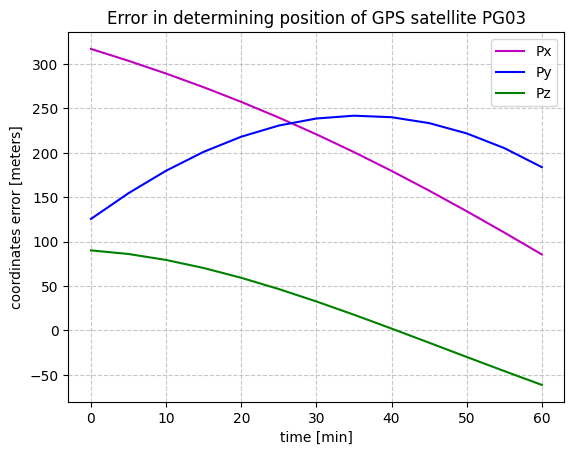

In [20]:
Px_list = [x[0] for x in coordinates_error]
Py_list = [y[1] for y in coordinates_error]
Pz_list = [z[2] for z in coordinates_error]

xt = np.linspace(0,60,13)

p1 = np.polyfit(xt,Px_list,7)
p2 = np.polyfit(xt,Py_list,7)
p3 = np.polyfit(xt,Pz_list,7)

f1 = np.polyval(p1,xt)
f2 = np.polyval(p2,xt)
f3 = np.polyval(p3,xt)

plt.plot(xt,f1,'m-',label = 'Px')
plt.plot(xt,f2,'b-',label = 'Py')
plt.plot(xt,f3,'g-',label = 'Pz')

plt.grid(True, linestyle='--', alpha=0.7)
plt.title('Error in determining position of GPS satellite %s' % sat_number)
plt.xlabel('time [min]')
plt.ylabel('coordinates error [meters]')
plt.legend()
plt.show()